In [1]:
import pandas as pd
import clustering as cl

In [2]:
file ="output/merged.xlsx"
df = pd.read_excel(file)

In [3]:
cols = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [11]:
def test(cluster_num, amount=True):
    main_items = cl.large_clients_finder(data=df, client_id_col_name='contractor', value_col_name='契約金額(円)', threshold_rate=0.8)
    if amount:
        df_pivoted = cl.get_pivoted_df(df=df, columns=['JFY'], index="contractor", values="契約金額(円)")
    else:
        df_pivoted = cl.get_pivoted_df_2(df=df, columns=['JFY'], index="contractor", values="契約金額(円)")
    non_null_df = cl.get_non_null_df(df_pivoted, total=True)
    print(non_null_df.shape)
    df_std = cl.get_starnderdized_df(df=non_null_df, values_cols=cols,  plot=False)
    distortions = cl.get_distortions_elbow_method(df=df_std, num_cluster=15, plot=True)
    test = cl.get_clustered_df(df=df_std, num_clusters=cluster_num)
    df_clustered = cl.add_removed_cols(df=test, non_null_df=non_null_df, cols=["contractor", "total"])
    cl.plot_cluters(df_clustered, cols, cluster_num)
    return df_clustered

Top 25 (1.64%) clients account for 80.25% of the total consumption or sales.
(261, 11)


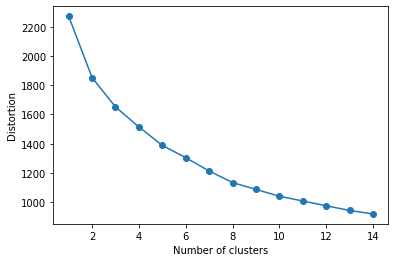

   cluster_labels  2011  2012  2013  2014  2015  2016  2017  2018  2019
0               0    56    56    56    56    56    56    56    56    56
1               1    25    25    25    25    25    25    25    25    25
2               2    50    50    50    50    50    50    50    50    50
3               3    55    55    55    55    55    55    55    55    55
4               4    32    32    32    32    32    32    32    32    32
5               5    43    43    43    43    43    43    43    43    43


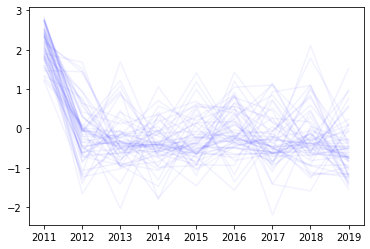

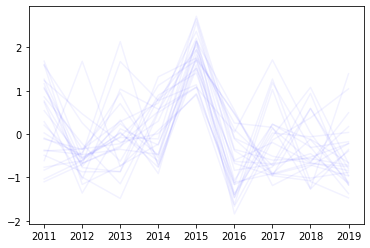

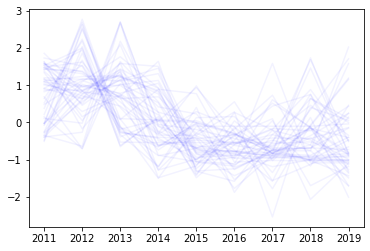

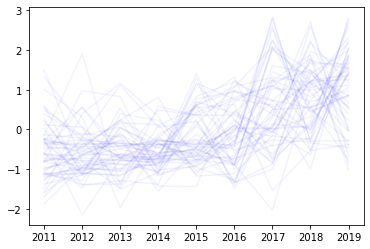

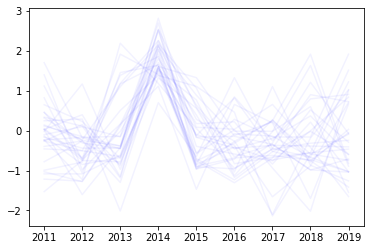

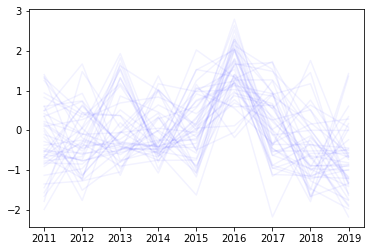

In [12]:
df_amount = test(cluster_num=6, amount=True)

In [13]:
print(df_amount.shape)
df_amount.head()

(261, 12)


,2011,2012,2013,2014,2015,2016,2017,2018,2019,cluster_labels,contractor,total
0,0.568986,-0.287954,-1.338410,0.100463,0.545770,0.629842,-1.539894,-0.533822,1.855020,3,GEアビエーション・ディストリビューション・ジャパン株式会社,5.262700e+10
1,2.430544,-0.721276,-0.629164,-0.504683,-0.635551,0.324554,0.848605,-0.365651,-0.747377,0,KDDI株式会社,1.239200e+09
2,-0.827948,0.978510,0.825793,-1.097134,0.246444,-1.341843,-1.003672,1.373445,0.846404,3,NECネッツエスアイ株式会社,7.326324e+09
3,-1.785226,1.480553,0.063432,1.030920,0.010333,0.977440,0.010473,-0.884727,-0.903198,5,NECファシリティーズ株式会社,1.468580e+09
4,0.027172,-0.744613,1.383309,1.852203,-0.754141,-1.305659,-0.687867,0.519533,-0.289939,4,NTTファイナンス株式会社,7.493550e+08


Top 25 (1.64%) clients account for 80.25% of the total consumption or sales.
(261, 11)


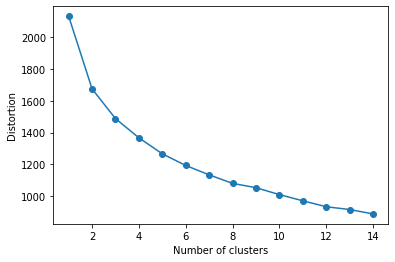

   cluster_labels  2011  2012  2013  2014  2015  2016  2017  2018  2019
0               0    35    35    35    35    35    35    35    35    35
1               1    19    19    19    19    19    19    19    19    19
2               2    37    37    37    37    37    37    37    37    37
3               3    63    63    63    63    63    63    63    63    63
4               4    39    39    39    39    39    39    39    39    39
5               5    68    68    68    68    68    68    68    68    68


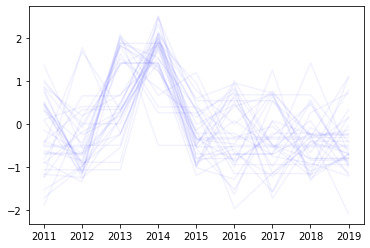

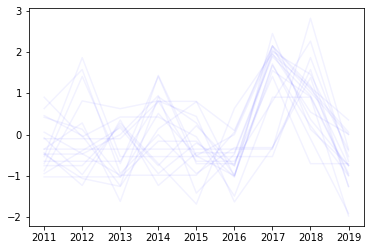

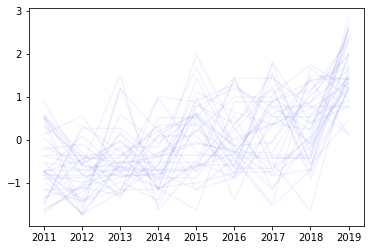

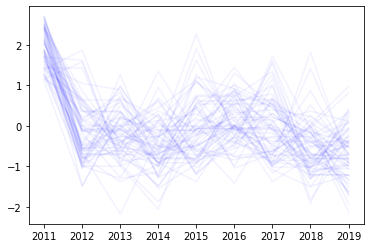

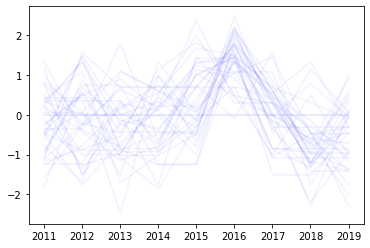

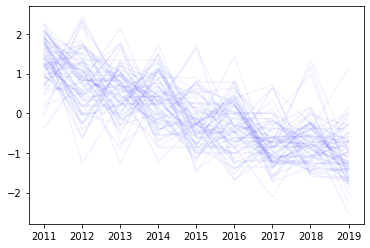

In [14]:
df_cont = test(cluster_num=6, amount=False)

In [8]:
print(df_cont.shape)
df_cont.head()

(261, 12)


,2011,2012,2013,2014,2015,2016,2017,2018,2019,cluster_labels,contractor,total
0,2.039700,1.456929,-0.291386,0.000000,-0.291386,-0.582772,-1.165543,-0.874157,-0.291386,1,GEアビエーション・ディストリビューション・ジャパン株式会社,54.0
1,1.855983,-0.995893,-0.995893,-0.588482,0.226339,1.448572,0.226339,-0.181071,-0.995893,1,KDDI株式会社,31.0
2,-0.956674,-1.705375,-0.582323,-0.956674,0.915079,1.289430,0.540729,0.540729,0.915079,2,NECネッツエスアイ株式会社,59.0
3,-1.066004,0.852803,-0.426401,-0.426401,-0.426401,2.132007,0.852803,-0.426401,-1.066004,2,NECファシリティーズ株式会社,24.0
4,2.080126,0.832050,0.832050,-0.416025,0.000000,-1.248075,-0.832050,-0.416025,-0.832050,1,NTTファイナンス株式会社,36.0


In [18]:
target_col = ['contractor', 'cluster_labels']

In [19]:
labeled = df_amount[target_col]
labeled['cluster_labels_num'] = df_cont['cluster_labels']

<ipython-input-19-7d8bb222d123>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled['cluster_labels_num'] = df_cont['cluster_labels']


In [20]:
labeled.colums = ['contractor', 'label_amount', 'label_num']

<ipython-input-20-3ed726bcdd78>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  labeled.colums = ['contractor', 'label_amount', 'label_num']


In [21]:
labeled.to_csv('output/labeled.csv', index=False)